In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

import os, sys
from pathlib import Path
import glob

from tqdm import tqdm

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
CUR_DIR = Path.cwd()
DATA_DIR = CUR_DIR / 'data/preprocessed'
DATA_DIR

WindowsPath('C:/Users/안현준/풍년보험/data/preprocessed')

In [3]:
df = pd.read_csv(f'{str(DATA_DIR)}/summary.csv', encoding='utf-8')
df

,연월,감자,고구마,고추(화건),깻잎,녹두(국산),단감,당근(무세척),대파,들깨(국산),...,양배추,양파,오이(가시),적상추,참외,콩(흰콩국산),토마토,팥(국산),포도(캠벨),풋고추
0,2001_1,12191.0,8348.0,224565.0,16365.0,237774.0,14214.000000,9313.0,855.0,171565.0,...,3186.0,13734.0,20007.0,8772.0,18722.666667,101957.0,8916.333333,147000.0,4490.857143,33783.0
1,2001_2,11558.0,9567.0,231208.0,12367.0,241875.0,16394.000000,10258.0,645.0,173458.0,...,2747.0,14062.0,23917.0,8510.0,35444.333333,95875.0,15831.666667,147875.0,6980.714286,58408.0
2,2001_3,11885.0,13990.0,231962.0,10785.0,242000.0,21579.000000,11277.0,669.0,183885.0,...,2783.0,14422.0,19942.0,6909.0,52166.000000,93885.0,22747.000000,147154.0,9470.571429,60646.0
3,2001_4,12133.0,14367.0,230333.0,8813.0,239833.0,21671.000000,13658.0,528.0,198375.0,...,2574.0,8752.0,13074.0,5284.0,39989.000000,91575.0,19756.000000,147000.0,11960.428571,24283.0
4,2001_5,22625.0,13594.0,238083.0,7533.0,238000.0,23043.400000,14900.0,803.0,199125.0,...,2913.0,5150.0,9236.0,4828.0,21800.000000,89142.0,13583.000000,147000.0,14450.285714,22025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2020_8,32806.0,55765.0,692489.0,37550.0,463910.0,37260.285714,45977.0,3081.0,488530.0,...,9079.0,20492.0,32260.0,49308.0,49751.000000,184790.0,29638.000000,355400.0,23571.000000,51334.0
236,2020_9,35413.0,38834.0,871229.0,35653.0,498295.0,36936.142857,70528.0,3178.0,527714.0,...,13033.0,23636.0,35076.0,30401.0,70438.000000,188171.0,50354.000000,365095.0,21720.000000,92749.0
237,2020_10,34283.0,33565.0,812179.0,22075.0,542379.0,36612.000000,66874.0,3019.0,571126.0,...,17068.0,23749.0,15384.0,11982.0,64834.500000,189516.0,50018.000000,382979.0,20284.000000,63283.0
238,2020_11,35830.0,36263.0,824724.0,18950.0,586057.0,32381.000000,42214.0,2982.0,606486.0,...,12744.0,25540.0,20919.0,11180.0,59231.000000,203514.0,35261.000000,453448.0,21071.333333,49019.0


In [4]:
crops = list(df.columns[1:])
print(crops)

['감자', '고구마', '고추(화건)', '깻잎', '녹두(국산)', '단감', '당근(무세척)', '대파', '들깨(국산)', '딸기', '무', '미나리', '방울토마토', '배(신고)', '배추', '백참깨(국산)', '복숭아(백도)', '사과(후지)', '생강(국산)', '수박', '시금치', '애호박', '양배추', '양파', '오이(가시)', '적상추', '참외', '콩(흰콩국산)', '토마토', '팥(국산)', '포도(캠벨)', '풋고추']


In [5]:
len(crops)

32

# Min-Max Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
df

,연월,감자,고구마,고추(화건),깻잎,녹두(국산),단감,당근(무세척),대파,들깨(국산),...,양배추,양파,오이(가시),적상추,참외,콩(흰콩국산),토마토,팥(국산),포도(캠벨),풋고추
0,2001_1,0.022285,0.000000,0.105580,0.330563,0.176583,0.000000,0.001891,0.097904,0.041157,...,0.076526,0.192445,0.347909,0.077017,0.164575,0.116091,0.032949,0.049876,0.000000,0.191487
1,2001_2,0.015805,0.023124,0.114768,0.204228,0.185026,0.085695,0.012222,0.035030,0.045032,...,0.049542,0.199798,0.447137,0.072393,0.416203,0.082867,0.194335,0.051615,0.075878,0.461075
2,2001_3,0.019152,0.107028,0.115811,0.154238,0.185283,0.289516,0.023361,0.042216,0.066379,...,0.051755,0.207869,0.346259,0.044138,0.667830,0.071997,0.355722,0.050182,0.151755,0.485576
3,2001_4,0.021691,0.114180,0.113558,0.091923,0.180822,0.293133,0.049389,0.000000,0.096044,...,0.038908,0.080753,0.171962,0.015460,0.484591,0.059378,0.285919,0.049876,0.227633,0.087483
4,2001_5,0.129091,0.099516,0.124277,0.051476,0.177048,0.347081,0.062966,0.082335,0.097580,...,0.059746,0.000000,0.074561,0.007412,0.210883,0.046088,0.141857,0.049876,0.303510,0.062763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2020_8,0.233307,0.899497,0.752779,1.000000,0.642130,0.905943,0.402687,0.764371,0.690074,...,0.438749,0.343952,0.658867,0.792404,0.631489,0.568572,0.516540,0.464196,0.581461,0.383631
236,2020_9,0.259993,0.578317,1.000000,0.940056,0.712918,0.893201,0.671068,0.793413,0.770295,...,0.681787,0.414438,0.730332,0.458730,0.942787,0.587041,1.000000,0.483471,0.525052,0.837032
237,2020_10,0.248426,0.478365,0.918326,0.510997,0.803674,0.880459,0.631124,0.745808,0.859171,...,0.929805,0.416971,0.230586,0.133667,0.858466,0.594388,0.992159,0.519026,0.481291,0.514446
238,2020_11,0.264262,0.529546,0.935678,0.412248,0.893594,0.714140,0.361551,0.734731,0.931563,...,0.664024,0.457124,0.371054,0.119514,0.774145,0.670853,0.647767,0.659126,0.505284,0.358287


감자 고구마 고추(화건) 깻잎 
녹두(국산) 단감 당근(무세척) 대파 
들깨(국산) 딸기 무 미나리 
방울토마토 배(신고) 배추 백참깨(국산) 
복숭아(백도) 사과(후지) 생강(국산) 수박 
시금치 애호박 양배추 양파 
오이(가시) 적상추 참외 콩(흰콩국산) 
토마토 팥(국산) 포도(캠벨) 풋고추 


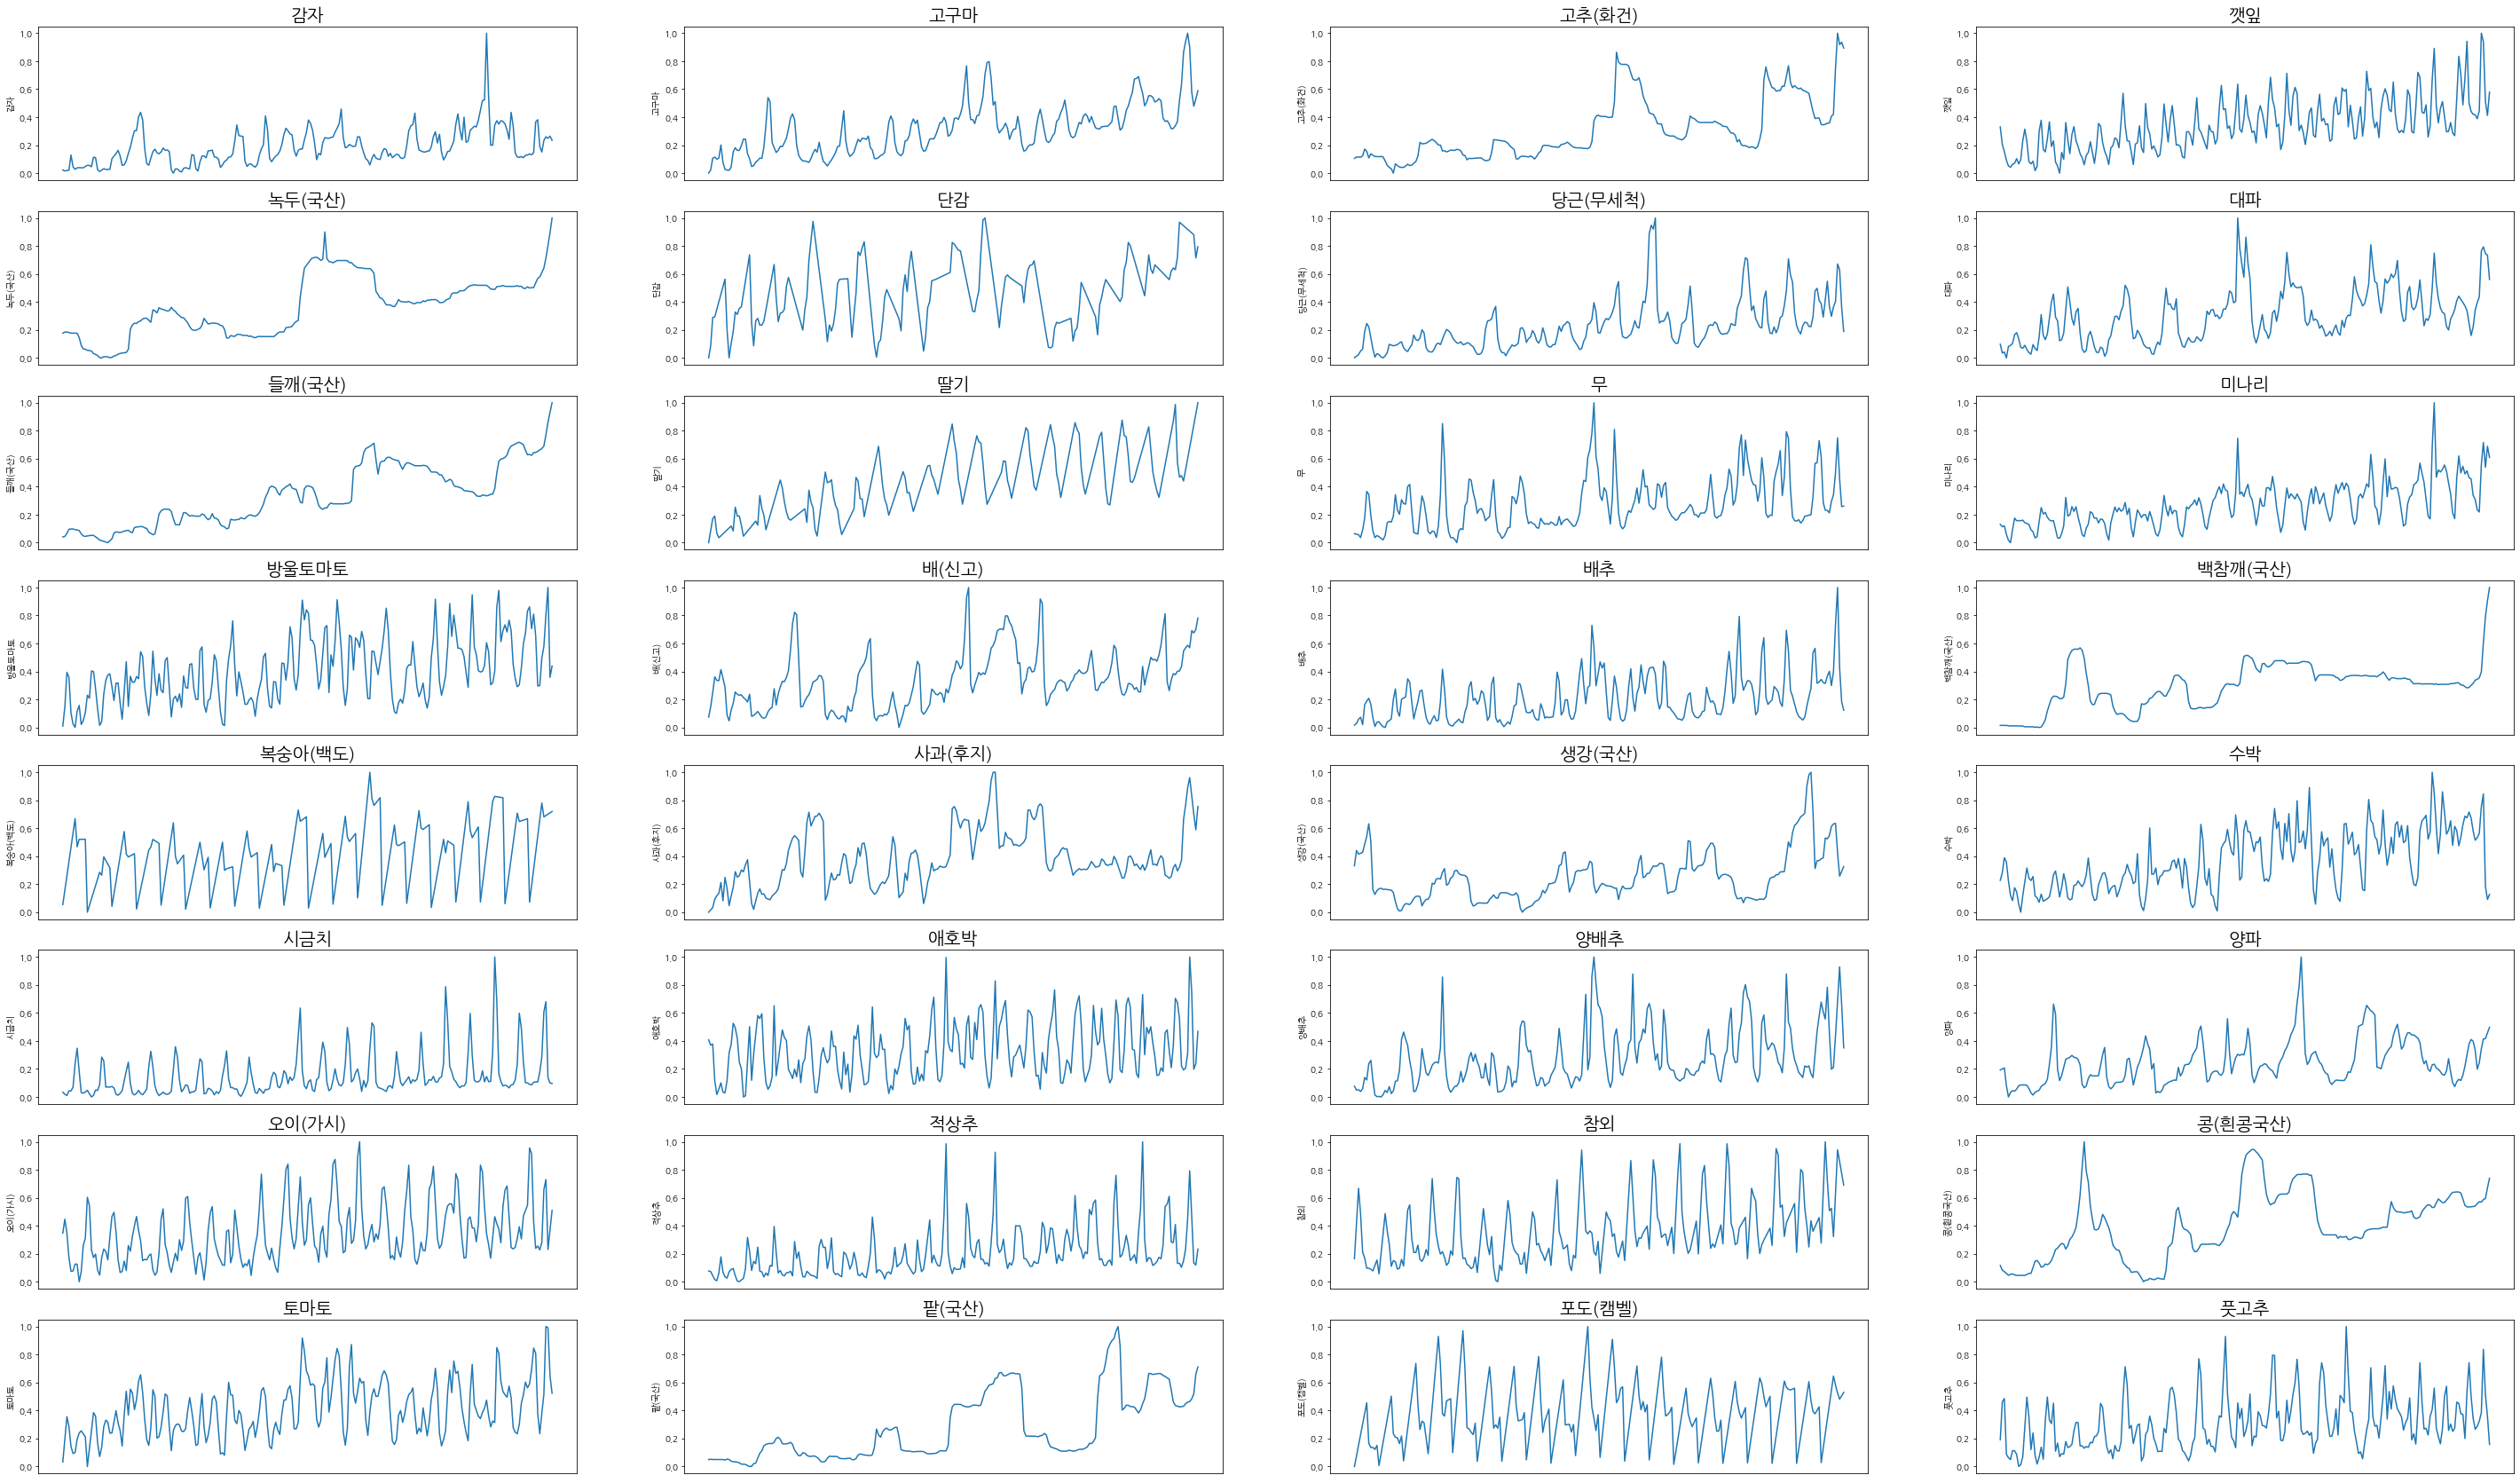

In [7]:
plt.rcParams['figure.figsize'] = (50, 30)

fig, axes = plt.subplots(nrows=8, ncols=4)
axes = axes.flatten()
for i, crop in enumerate(crops):
    print(crop, end=' ')
    if (i + 1) % 4 == 0:
        print()
    sns.lineplot(x=df['연월'], y=df[crop], ax=axes[i])
    axes[i].set_title(crop, fontsize=20)
    axes[i].set_xticks([])
    axes[i].set_xlabel('')

In [8]:
data = []
for crop in crops:
    data.append(df[crop])

len(data)

32

In [9]:
!pip install tslearn

In [10]:
from tslearn.clustering import TimeSeriesKMeans

model = TimeSeriesKMeans(n_clusters=7, metric="dtw", max_iter=50, random_state=42)
model.fit(data)
model.labels_

array([0, 4, 3, 2, 3, 1, 0, 4, 3, 2, 0, 0, 2, 4, 0, 4, 1, 4, 4, 2, 6, 2,
       2, 0, 2, 6, 1, 3, 2, 4, 5, 1], dtype=int64)

In [11]:
# crop_name, crop_class, price_class
crop_cluster = {
    '감자': {'crop_class': '식량작물', 'price_class': -1},
    '고구마': {'crop_class': '식량작물', 'price_class': -1},
    '고추(화건)': {'crop_class': '채소', 'price_class': -1},
    '깻잎': {'crop_class': '채소', 'price_class': -1},
    '녹두(국산)': {'crop_class': '식량작물', 'price_class': -1},
    '단감': {'crop_class': '과일', 'price_class': -1},
    '당근(무세척)': {'crop_class': '채소', 'price_class': -1},
    '대파': {'crop_class': '채소', 'price_class': -1},
    '들깨(국산)': {'crop_class': '특용작물', 'price_class': -1},
    '딸기': {'crop_class': '채소', 'price_class': -1},
    '무': {'crop_class': '채소', 'price_class': -1},
    '미나리': {'crop_class': '채소', 'price_class': -1},
    '방울토마토': {'crop_class': '채소', 'price_class': -1},
    '배(신고)': {'crop_class': '과일', 'price_class': -1},
    '배추': {'crop_class': '채소', 'price_class': -1},
    '백참깨(국산)': {'crop_class': '특용작물', 'price_class': -1},
    '복숭아(백도)': {'crop_class': '과일', 'price_class': -1},
    '사과(후지)': {'crop_class': '과일', 'price_class': -1},
    '생강(국산)': {'crop_class': '채소', 'price_class': -1},
    '수박': {'crop_class': '채소', 'price_class': -1},
    '시금치': {'crop_class': '채소', 'price_class': -1},
    '애호박': {'crop_class': '채소', 'price_class': -1},
    '양배추': {'crop_class': '채소', 'price_class': -1},
    '양파': {'crop_class': '채소', 'price_class': -1},
    '오이(가시)': {'crop_class': '채소', 'price_class': -1},
    '적상추': {'crop_class': '채소', 'price_class': -1},
    '참외': {'crop_class': '채소', 'price_class': -1},
    '콩(흰콩국산)': {'crop_class': '특용작물', 'price_class': -1},
    '토마토': {'crop_class': '채소', 'price_class': -1},
    '팥(국산)': {'crop_class': '식량작물', 'price_class': -1},
    '포도(캠벨)': {'crop_class': '과일', 'price_class': -1},
    '풋고추': {'crop_class': '채소', 'price_class': -1},
}


In [12]:
for i, crop in enumerate(crops):
    label = model.labels_[i]
    crop_cluster[crop]['price_class'] = label

# price cluster 확인

In [13]:
from collections import defaultdict
price_classes = defaultdict(list)
for crop_name, crop_attr in crop_cluster.items():
    price_classes[crop_attr['price_class']].append(crop_name)
    
price_classes

defaultdict(list,
            {0: ['감자', '당근(무세척)', '무', '미나리', '배추', '양파'],
             4: ['고구마', '대파', '배(신고)', '백참깨(국산)', '사과(후지)', '생강(국산)', '팥(국산)'],
             3: ['고추(화건)', '녹두(국산)', '들깨(국산)', '콩(흰콩국산)'],
             2: ['깻잎', '딸기', '방울토마토', '수박', '애호박', '양배추', '오이(가시)', '토마토'],
             1: ['단감', '복숭아(백도)', '참외', '풋고추'],
             6: ['시금치', '적상추'],
             5: ['포도(캠벨)']})

In [21]:
import pickle

with open('./results/cluster_id.pkl', 'wb') as f:
    pickle.dump(price_classes, f, pickle.HIGHEST_PROTOCOL)

In [14]:
colors = sns.color_palette("Set1").as_hex()
colors

['#e41a1c',
 '#377eb8',
 '#4daf4a',
 '#984ea3',
 '#ff7f00',
 '#ffff33',
 '#a65628',
 '#f781bf',
 '#999999']

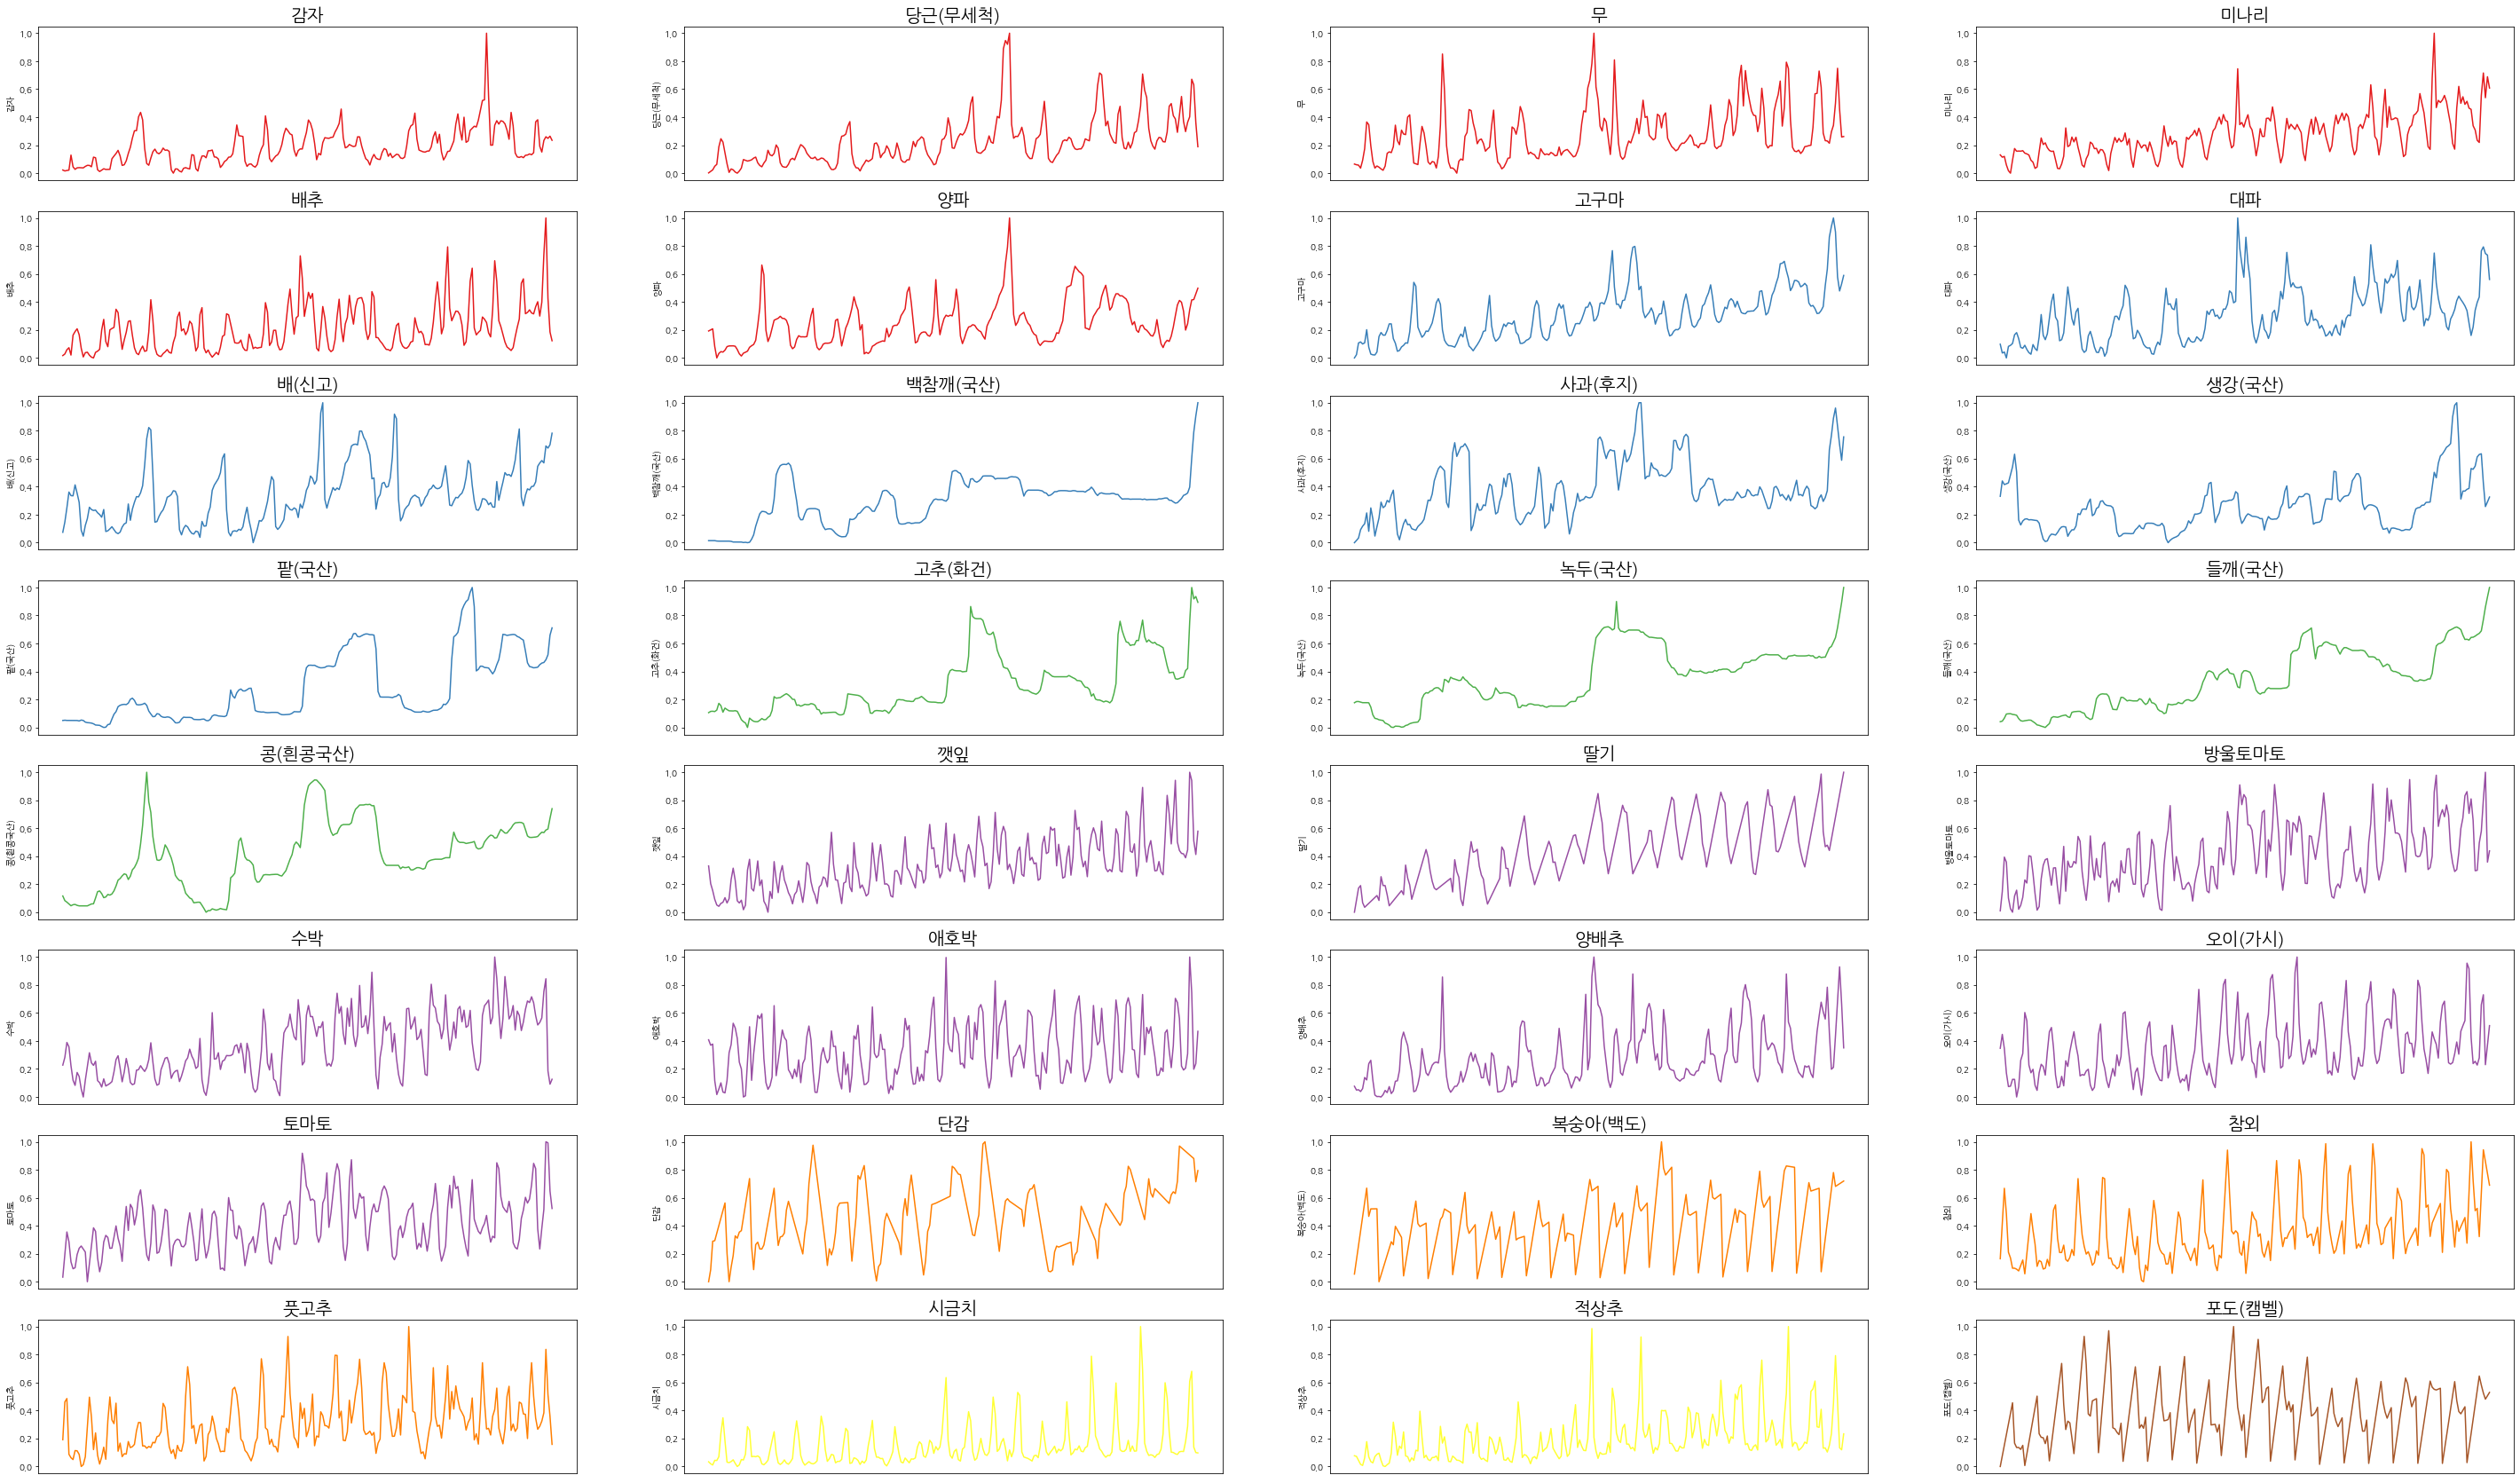

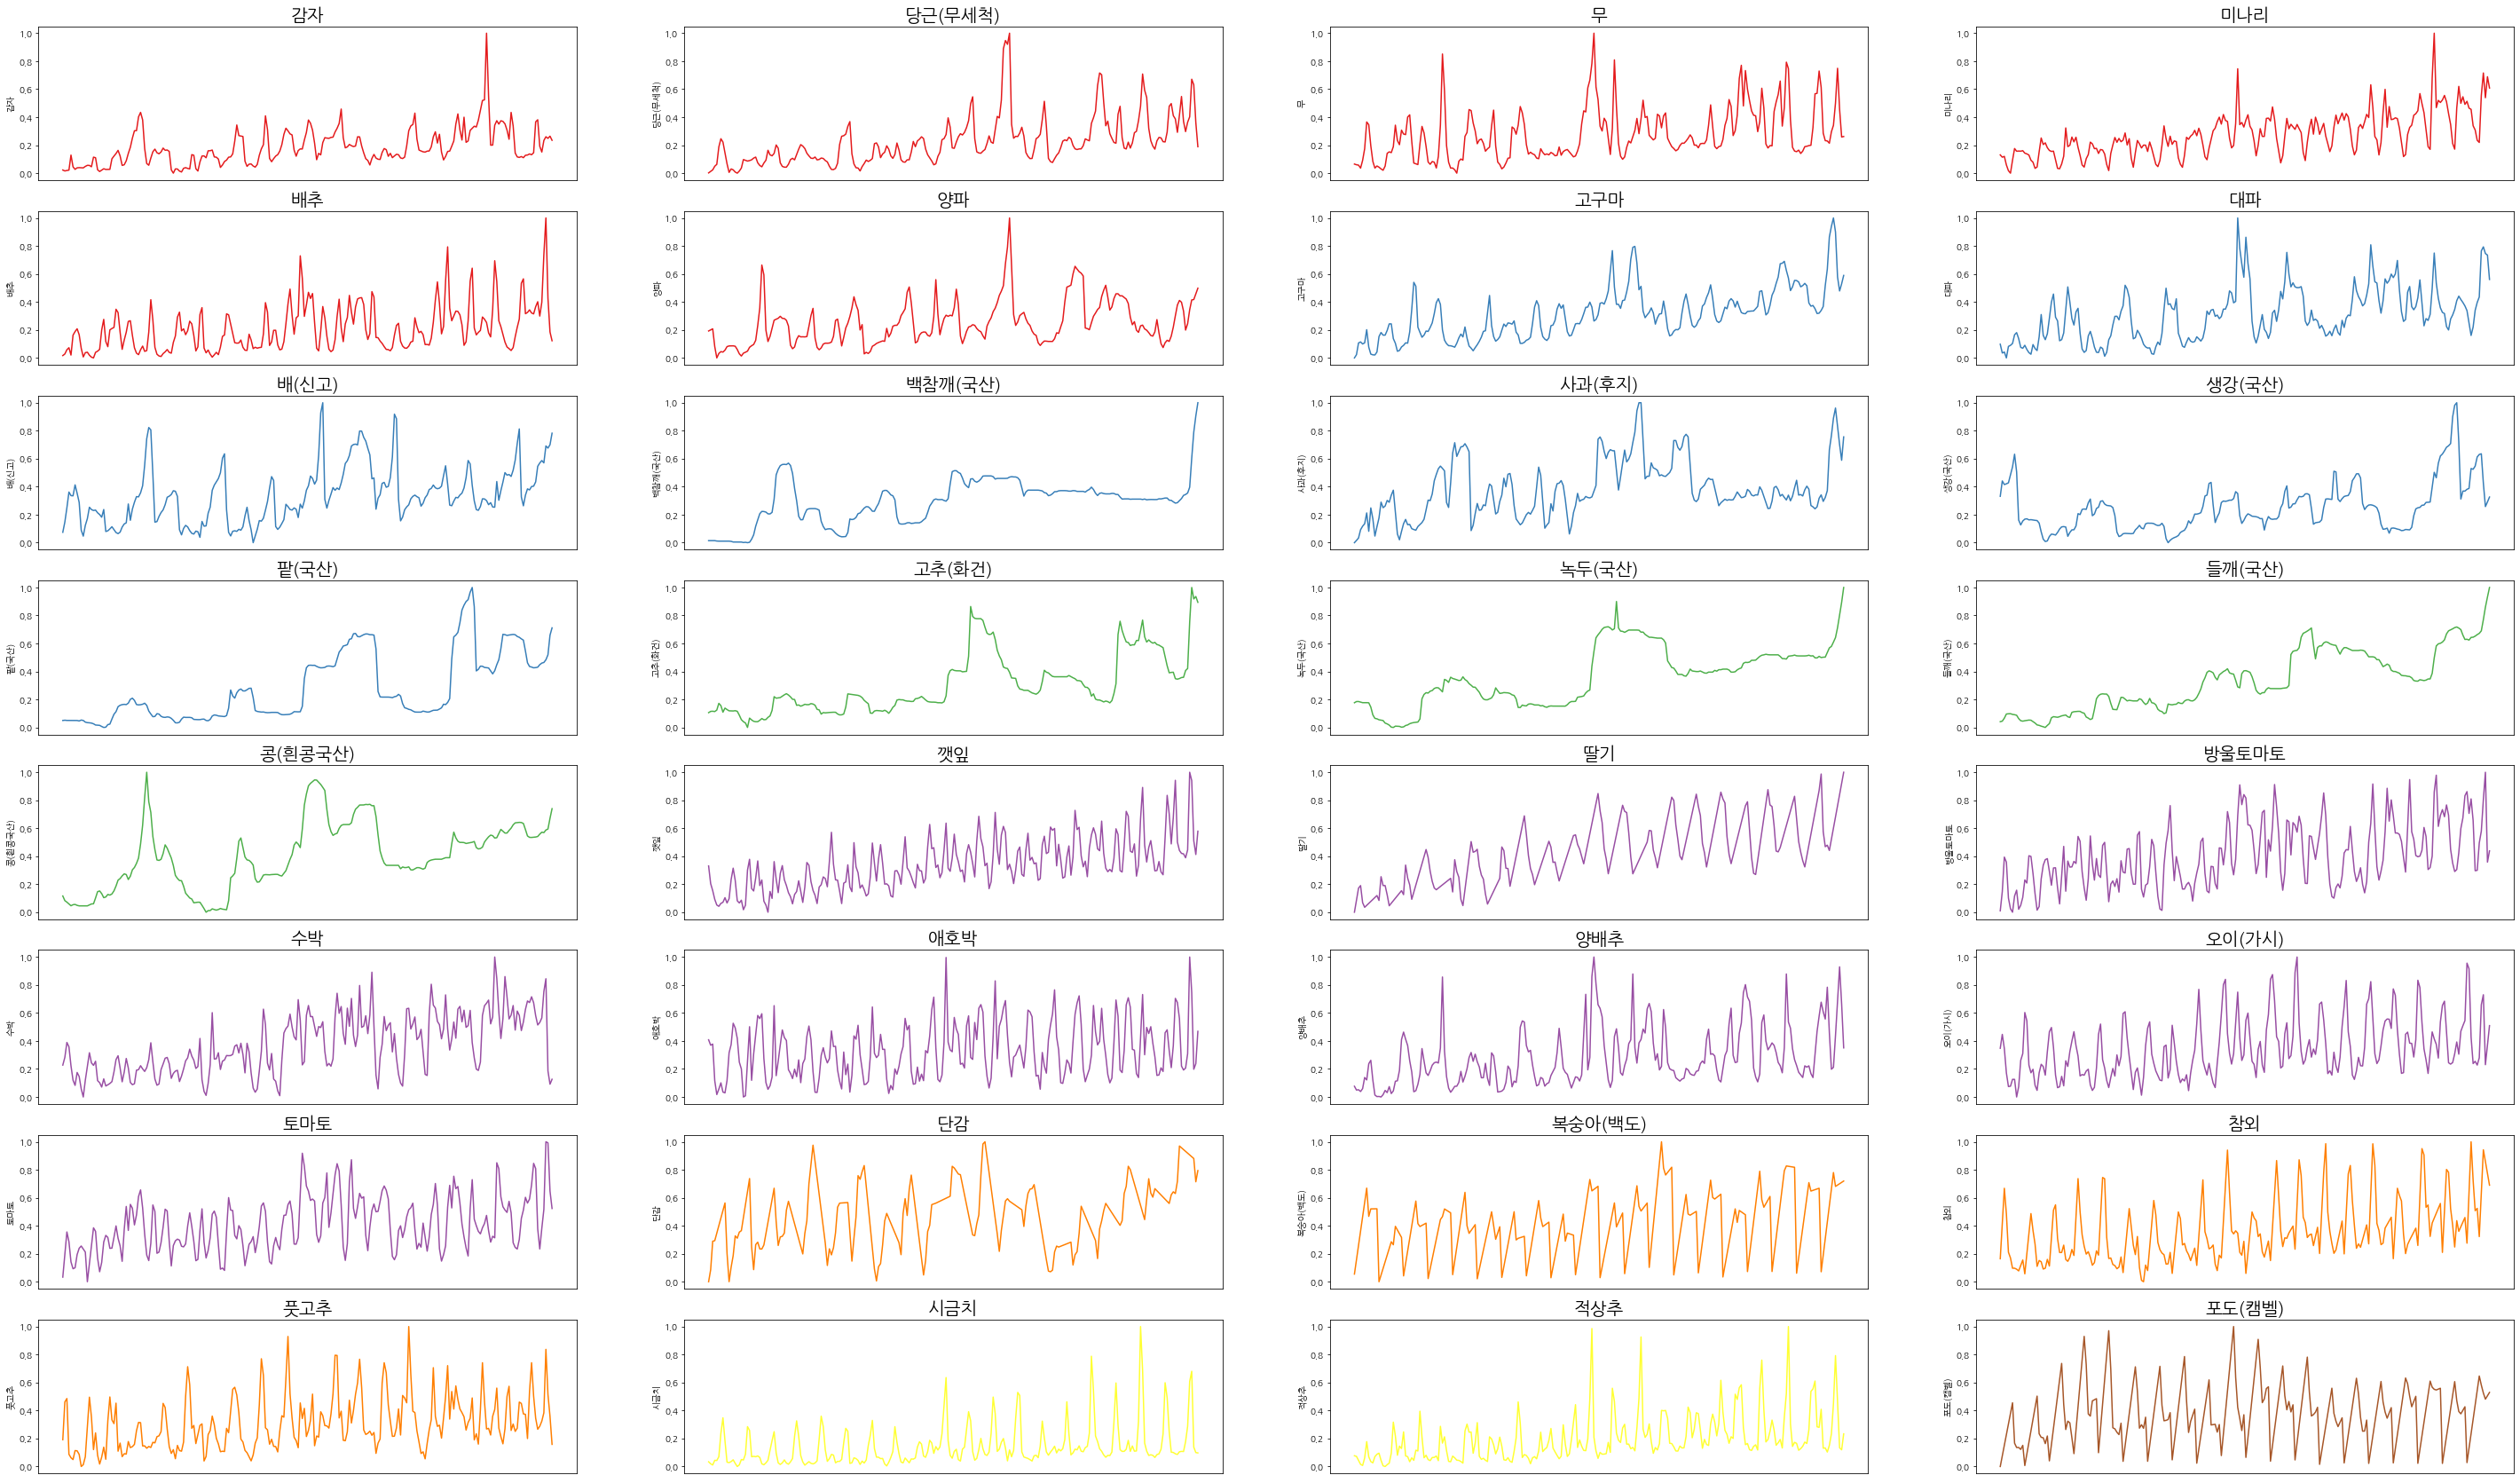

In [30]:
fig, axes = plt.subplots(nrows=8, ncols=4)
axes = axes.flatten()
i = 0 # axes index
ci = 0 # color index
for class_, crop_list in price_classes.items():
    for crop in crop_list:
        sns.lineplot(x=df['연월'], y=df[crop], ax=axes[i], color=colors[ci])
        axes[i].set_title(crop, fontsize=20)
        axes[i].set_xticks([])
        axes[i].set_xlabel('')
        i += 1
    ci += 1
    
fig.savefig('./results/cluster_price.png', dpi=300, bbox_inches='tight')
fig

In [16]:
crop_classes = []
for crop_name, crop_attr in crop_cluster.items():
    crop_classes.append(crop_attr['crop_class'])
crop_classes = sorted(set(crop_classes))
crop_classes

['과일', '식량작물', '채소', '특용작물']

In [18]:
import pickle

with open('./results/crop_cluster.pickle', 'wb') as f:
    pickle.dump(crop_cluster, f, pickle.HIGHEST_PROTOCOL)

In [20]:
with open('./results/crop_cluster.pickle', 'rb') as f:
    data = pickle.load(f)
data

{'감자': {'crop_class': '식량작물', 'price_class': 0},
 '고구마': {'crop_class': '식량작물', 'price_class': 4},
 '고추(화건)': {'crop_class': '채소', 'price_class': 3},
 '깻잎': {'crop_class': '채소', 'price_class': 2},
 '녹두(국산)': {'crop_class': '식량작물', 'price_class': 3},
 '단감': {'crop_class': '과일', 'price_class': 1},
 '당근(무세척)': {'crop_class': '채소', 'price_class': 0},
 '대파': {'crop_class': '채소', 'price_class': 4},
 '들깨(국산)': {'crop_class': '특용작물', 'price_class': 3},
 '딸기': {'crop_class': '채소', 'price_class': 2},
 '무': {'crop_class': '채소', 'price_class': 0},
 '미나리': {'crop_class': '채소', 'price_class': 0},
 '방울토마토': {'crop_class': '채소', 'price_class': 2},
 '배(신고)': {'crop_class': '과일', 'price_class': 4},
 '배추': {'crop_class': '채소', 'price_class': 0},
 '백참깨(국산)': {'crop_class': '특용작물', 'price_class': 4},
 '복숭아(백도)': {'crop_class': '과일', 'price_class': 1},
 '사과(후지)': {'crop_class': '과일', 'price_class': 4},
 '생강(국산)': {'crop_class': '채소', 'price_class': 4},
 '수박': {'crop_class': '채소', 'price_class': 2},
 '시금치': 